In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Task 1 1

In [4]:
# Method 1
titanic_groupby_sex = titanic.groupby(by='sex').count()
titanic_gender=titanic_groupby_sex['name']

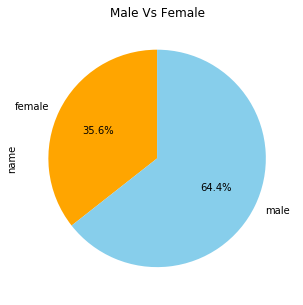

In [5]:
plt.figure(figsize=(12,5))
plt.title('Male Vs Female')
pie_color = ('orange','SkyBlue')
titanic_gender.plot(kind='pie',startangle = 90,colors=pie_color,autopct='%1.1f%%')

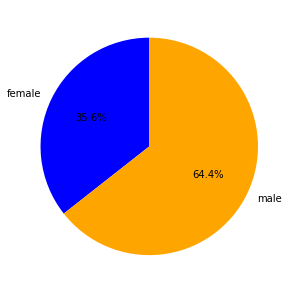

In [27]:
# Method 2
plt.figure(figsize=(12,5))
sex_1 = titanic.sex.unique()
sex_1 = [x for x in sex_1 if str(x) != 'nan']
MF_Count = titanic_gender
gender = sex_1
colors = ['b', 'orange']
plt.pie(MF_Count, labels=gender, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

2.

In [38]:
titanic_scatter.head()

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female


In [73]:
titanic_scatter = titanic[['fare','age','sex']]

In [74]:
titanic_scatter = titanic_scatter.round({'age':0})

In [ ]:
titanic_scatter[titanic_scatter.age.isnull()]
titanic_scatter[titanic_scatter.age.isnull()].count()

In [78]:
titanic_scatter = titanic.dropna(subset=['age'])

In [79]:
titanic_scatter.sex.unique()

array(['female', 'male'], dtype=object)

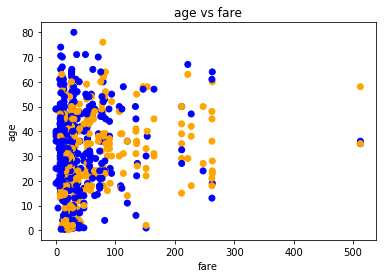

In [102]:
plt.title('age vs fare')
plt.xlabel('fare')
plt.ylabel('age')
mapping = {'male' : 'blue', 'female' : 'orange'}
plt.scatter(titanic_scatter.fare,titanic_scatter.age,c=titanic_scatter['sex'].map(mapping))

In [37]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
                   

In [25]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


Task 2. 1.

In [26]:
df.iloc[1,1] = 10055
df.iloc[3,1] = 10075
df.FlightNumber = df.FlightNumber.astype('int64')

In [27]:
df.info(),df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    5 non-null int64
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: int64(1), object(3)
memory usage: 240.0+ bytes


(None,             From_To  FlightNumber  RecentDelays              Airline
 0      LoNDon_paris         10045      [23, 47]               KLM(!)
 1      MAdrid_miLAN         10055            []    <Air France> (12)
 2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
 3    Budapest_PaRis         10075          [13]       12. Air France
 4   Brussels_londOn         10085      [67, 32]          "Swiss Air")

Task 2. 2

In [28]:
new = df["From_To"].str.split("_", n = 1, expand = True) 
df["From"] = new[0]
df["To"] = new[1]

In [29]:
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


Task 2. 3

In [30]:
df["From"],df["To"]  = df["From"].str.title(),df["To"].str.title()
del df["From_To"]
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


Task2.4

In [34]:
df1 = pd.DataFrame(df.RecentDelays.values.tolist())
df['RecentDelays1']=df1[0]
df['RecentDelays2']=df1[1]
df['RecentDelays3']=df1[2]
df

,FlightNumber,RecentDelays,Airline,From,To,RecentDelays1,RecentDelays2,RecentDelays3
0,10045,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,10055,[],<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN


In [35]:
del df['RecentDelays']

In [36]:
df

,FlightNumber,Airline,From,To,RecentDelays1,RecentDelays2,RecentDelays3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
